In [3]:
!pip install opencv-python

     |################################| 51.0 MB 8.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [6]:
!apt update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages3m
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages 

In [9]:
 !apt install -y libgl1-mesa-glx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0
  libglx0 libllvm10 libpciaccess0 libsensors4 libx11-xcb1 libxcb-dri2-0
  libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-sync1 libxdamage1
  libxfixes3 libxshmfence1 libxxf86vm1
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libgl1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa
  libglvnd0 libglx-mesa0 libglx0 libllvm10 libpciaccess0 libsensors4
  libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-sync1 libxdamage1 libxfixes3 libxshmfence1 libxxf86vm1
0 upgraded, 27 newly installed, 0 to remove and 28 not upgraded.
Need to get 25

7Progress: [ 24%] [#############.............................................] 87Progress: [ 24%] [##############............................................] 8Selecting previously unselected package libsensors4:amd64.
Preparing to unpack .../11-libsensors4_1%3a3.4.0-4_amd64.deb ...
7Progress: [ 25%] [##############............................................] 8Unpacking libsensors4:amd64 (1:3.4.0-4) ...
7Progress: [ 26%] [###############...........................................] 8Selecting previously unselected package libgl1-mesa-dri:amd64.
Preparing to unpack .../12-libgl1-mesa-dri_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
7Progress: [ 27%] [###############...........................................] 8Unpacking libgl1-mesa-dri:amd64 (20.0.8-0ubuntu1~18.04.1) ...
7Progress: [ 29%] [################..........................................] 8Selecting previously unselected package libglvnd0:amd64.
Preparing to unpack .../13-libglvnd0_1.0.0-2ubuntu2.3_amd64.deb ...
7Progres

7Progress: [ 93%] [#####################################################.....] 87Progress: [ 93%] [######################################################....] 8Setting up libglx-mesa0:amd64 (20.0.8-0ubuntu1~18.04.1) ...
7Progress: [ 94%] [######################################################....] 8Setting up libglx0:amd64 (1.0.0-2ubuntu2.3) ...
7Progress: [ 96%] [#######################################################...] 87Progress: [ 96%] [#######################################################...] 8Setting up libgl1:amd64 (1.0.0-2ubuntu2.3) ...
7Progress: [ 97%] [########################################################..] 8Setting up libgl1-mesa-glx:amd64 (20.0.8-0ubuntu1~18.04.1) ...
7Progress: [ 99%] [#########################################################.] 87Progress: [ 99%] [#########################################################.] 8Processing triggers for libc-bin (2.27-3ubuntu1.4) ...
/sbin/ldconfig.real: File /usr/lib/x86_64-linux-gnu/libnvidia-compiler.

In [1]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import os
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator

from PIL import Image
from torch.nn.parallel import DistributedDataParallel

In [2]:
def register():
    from detectron2.data.datasets import register_coco_instances
    register_coco_instances("vtt_train", {}, "/workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/annotations/instances_train.json", "/workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/train")
    register_coco_instances("vtt_val", {}, "/workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/annotations/instances_val.json", "/workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/val")
register()

In [3]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")  # Let training initialize from model zoo

cfg.DATASETS.TRAIN = ("vtt_train",)
cfg.DATASETS.TEST = ("vtt_val",)

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 20000
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 15
cfg.DATALOADER.NUM_WORKERS = 4

cfg.TEST.EVAL_PERIOD = 1000

In [4]:
class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

In [5]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = Trainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/27 07:56:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[06/27 07:56:48 d2.data.datasets.coco]: Loaded 1196 images in COCO format from /workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/annotations/instances_train.json
[06/27 07:56:48 d2.data.build]: Removed 2 images with no usable annotations. 1194 images left.
[06/27 07:56:48 d2.data.build]: Distribution of instances among all 15 categories:
|   category   | #instances   |  category  | #instances   |   category   | #instances   |
|:------------:|:-------------|:----------:|:-------------|:------------:|:-------------|
|    person    | 2550         |    car     | 127          |   handbag    | 62           |
|     tie      | 105          |   bottle   | 224          |     cup      | 129          |
|     bowl     | 102          |   chair    | 172          | potted plant | 87           |
| dining table | 48           |     tv     | 79           |  cell phone  | 50           |
| refrigerator | 28           |    book    | 75           |     vase     | 30         

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (60, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (60,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

[06/27 07:56:48 d2.engine.train_loop]: Starting training from iteration 0


/detectron2/detectron2/modeling/roi_heads/fast_rcnn.py:103: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  num_fg = fg_inds.nonzero().numel()


[06/27 07:57:03 d2.utils.events]:  eta: 3:31:30  iter: 19  total_loss: 3.623  loss_cls: 2.868  loss_box_reg: 0.7468  loss_rpn_cls: 0.01427  loss_rpn_loc: 0.01894  time: 0.6302  data_time: 0.0461  lr: 1.9981e-05  max_mem: 6640M
[06/27 07:57:16 d2.utils.events]:  eta: 3:31:52  iter: 39  total_loss: 3.201  loss_cls: 2.447  loss_box_reg: 0.6355  loss_rpn_cls: 0.01092  loss_rpn_loc: 0.01692  time: 0.6340  data_time: 0.0109  lr: 3.9961e-05  max_mem: 6640M
[06/27 07:57:28 d2.utils.events]:  eta: 3:32:09  iter: 59  total_loss: 2.226  loss_cls: 1.524  loss_box_reg: 0.6966  loss_rpn_cls: 0.01098  loss_rpn_loc: 0.0151  time: 0.6329  data_time: 0.0106  lr: 5.9941e-05  max_mem: 6640M
[06/27 07:57:41 d2.utils.events]:  eta: 3:32:04  iter: 79  total_loss: 1.591  loss_cls: 0.8708  loss_box_reg: 0.7218  loss_rpn_cls: 0.006812  loss_rpn_loc: 0.01623  time: 0.6344  data_time: 0.0108  lr: 7.9921e-05  max_mem: 6640M
[06/27 07:57:54 d2.utils.events]:  eta: 3:32:23  iter: 99  total_loss: 1.354  loss_cls: 0.6

[06/27 08:05:07 d2.utils.events]:  eta: 3:45:12  iter: 719  total_loss: 0.4687  loss_cls: 0.1621  loss_box_reg: 0.295  loss_rpn_cls: 0.004808  loss_rpn_loc: 0.01957  time: 0.6885  data_time: 0.0107  lr: 0.00071928  max_mem: 6640M
[06/27 08:05:20 d2.utils.events]:  eta: 3:44:59  iter: 739  total_loss: 0.5043  loss_cls: 0.1613  loss_box_reg: 0.318  loss_rpn_cls: 0.003128  loss_rpn_loc: 0.01343  time: 0.6885  data_time: 0.0106  lr: 0.00073926  max_mem: 6640M
[06/27 08:05:34 d2.utils.events]:  eta: 3:44:43  iter: 759  total_loss: 0.5148  loss_cls: 0.1624  loss_box_reg: 0.316  loss_rpn_cls: 0.005287  loss_rpn_loc: 0.01655  time: 0.6885  data_time: 0.0112  lr: 0.00075924  max_mem: 6640M
[06/27 08:05:48 d2.utils.events]:  eta: 3:44:24  iter: 779  total_loss: 0.3675  loss_cls: 0.08933  loss_box_reg: 0.2505  loss_rpn_cls: 0.003774  loss_rpn_loc: 0.01664  time: 0.6884  data_time: 0.0106  lr: 0.00077922  max_mem: 6640M
[06/27 08:06:02 d2.utils.events]:  eta: 3:44:07  iter: 799  total_loss: 0.4702

[06/27 08:08:33 d2.engine.defaults]: Evaluation results for vtt_val in csv format:
[06/27 08:08:33 d2.evaluation.testing]: copypaste: Task: bbox
[06/27 08:08:33 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[06/27 08:08:33 d2.evaluation.testing]: copypaste: 37.2499,67.5810,34.2707,23.3663,31.2473,36.6022
[06/27 08:08:33 d2.utils.events]:  eta: 3:42:00  iter: 999  total_loss: 0.4192  loss_cls: 0.1267  loss_box_reg: 0.2659  loss_rpn_cls: 0.002334  loss_rpn_loc: 0.01829  time: 0.6889  data_time: 0.0110  lr: 0.000999  max_mem: 6640M
[06/27 08:08:46 d2.utils.events]:  eta: 3:41:46  iter: 1019  total_loss: 0.3769  loss_cls: 0.09968  loss_box_reg: 0.2228  loss_rpn_cls: 0.003169  loss_rpn_loc: 0.0176  time: 0.6887  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 08:09:00 d2.utils.events]:  eta: 3:41:40  iter: 1039  total_loss: 0.3475  loss_cls: 0.08711  loss_box_reg: 0.235  loss_rpn_cls: 0.003001  loss_rpn_loc: 0.01505  time: 0.6888  data_time: 0.0110  lr: 0.001  max_mem: 664

[06/27 08:16:25 d2.utils.events]:  eta: 3:33:57  iter: 1679  total_loss: 0.3252  loss_cls: 0.07488  loss_box_reg: 0.2071  loss_rpn_cls: 0.0008223  loss_rpn_loc: 0.01544  time: 0.6905  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 08:16:39 d2.utils.events]:  eta: 3:33:42  iter: 1699  total_loss: 0.3342  loss_cls: 0.07575  loss_box_reg: 0.2273  loss_rpn_cls: 0.002087  loss_rpn_loc: 0.01405  time: 0.6906  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 08:16:53 d2.utils.events]:  eta: 3:33:26  iter: 1719  total_loss: 0.392  loss_cls: 0.1012  loss_box_reg: 0.2588  loss_rpn_cls: 0.002589  loss_rpn_loc: 0.01858  time: 0.6906  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 08:17:06 d2.utils.events]:  eta: 3:33:10  iter: 1739  total_loss: 0.3697  loss_cls: 0.08944  loss_box_reg: 0.2622  loss_rpn_cls: 0.001265  loss_rpn_loc: 0.01393  time: 0.6904  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 08:17:20 d2.utils.events]:  eta: 3:32:57  iter: 1759  total_loss: 0.3715  loss_cls

[06/27 08:20:31 d2.utils.events]:  eta: 3:29:38  iter: 2019  total_loss: 0.3067  loss_cls: 0.08948  loss_box_reg: 0.2029  loss_rpn_cls: 0.001964  loss_rpn_loc: 0.01528  time: 0.6899  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 08:20:45 d2.utils.events]:  eta: 3:29:25  iter: 2039  total_loss: 0.3016  loss_cls: 0.08078  loss_box_reg: 0.2071  loss_rpn_cls: 0.002044  loss_rpn_loc: 0.01207  time: 0.6899  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 08:20:59 d2.utils.events]:  eta: 3:29:10  iter: 2059  total_loss: 0.2667  loss_cls: 0.06391  loss_box_reg: 0.1971  loss_rpn_cls: 0.001116  loss_rpn_loc: 0.01449  time: 0.6899  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 08:21:12 d2.utils.events]:  eta: 3:28:53  iter: 2079  total_loss: 0.2988  loss_cls: 0.08002  loss_box_reg: 0.2189  loss_rpn_cls: 0.000707  loss_rpn_loc: 0.01445  time: 0.6897  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 08:21:26 d2.utils.events]:  eta: 3:28:39  iter: 2099  total_loss: 0.2869  loss_cl

[06/27 08:28:33 d2.utils.events]:  eta: 3:20:57  iter: 2719  total_loss: 0.2437  loss_cls: 0.06264  loss_box_reg: 0.1664  loss_rpn_cls: 0.0009104  loss_rpn_loc: 0.01363  time: 0.6893  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 08:28:47 d2.utils.events]:  eta: 3:20:45  iter: 2739  total_loss: 0.222  loss_cls: 0.06294  loss_box_reg: 0.1599  loss_rpn_cls: 0.00058  loss_rpn_loc: 0.009536  time: 0.6892  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 08:29:01 d2.utils.events]:  eta: 3:20:31  iter: 2759  total_loss: 0.242  loss_cls: 0.0582  loss_box_reg: 0.1749  loss_rpn_cls: 0.0007919  loss_rpn_loc: 0.01424  time: 0.6892  data_time: 0.0110  lr: 0.001  max_mem: 6640M
[06/27 08:29:15 d2.utils.events]:  eta: 3:20:16  iter: 2779  total_loss: 0.2507  loss_cls: 0.0568  loss_box_reg: 0.1719  loss_rpn_cls: 0.001565  loss_rpn_loc: 0.01209  time: 0.6892  data_time: 0.0110  lr: 0.001  max_mem: 6640M
[06/27 08:29:28 d2.utils.events]:  eta: 3:20:00  iter: 2799  total_loss: 0.2653  loss_cls:

[06/27 08:32:40 d2.utils.events]:  eta: 3:17:05  iter: 3059  total_loss: 0.2329  loss_cls: 0.05484  loss_box_reg: 0.1583  loss_rpn_cls: 0.0003101  loss_rpn_loc: 0.01252  time: 0.6892  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 08:32:54 d2.utils.events]:  eta: 3:16:54  iter: 3079  total_loss: 0.2616  loss_cls: 0.06023  loss_box_reg: 0.1769  loss_rpn_cls: 0.000708  loss_rpn_loc: 0.01509  time: 0.6892  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 08:33:08 d2.utils.events]:  eta: 3:16:41  iter: 3099  total_loss: 0.2685  loss_cls: 0.06017  loss_box_reg: 0.1956  loss_rpn_cls: 0.001404  loss_rpn_loc: 0.01034  time: 0.6893  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 08:33:22 d2.utils.events]:  eta: 3:16:26  iter: 3119  total_loss: 0.2287  loss_cls: 0.0457  loss_box_reg: 0.1742  loss_rpn_cls: 0.0007399  loss_rpn_loc: 0.01275  time: 0.6893  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 08:33:36 d2.utils.events]:  eta: 3:16:16  iter: 3139  total_loss: 0.232  loss_cl

[06/27 08:40:43 d2.utils.events]:  eta: 3:09:00  iter: 3759  total_loss: 0.2205  loss_cls: 0.05612  loss_box_reg: 0.1557  loss_rpn_cls: 0.0004681  loss_rpn_loc: 0.01128  time: 0.6891  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 08:40:57 d2.utils.events]:  eta: 3:08:46  iter: 3779  total_loss: 0.2222  loss_cls: 0.05788  loss_box_reg: 0.1489  loss_rpn_cls: 0.001419  loss_rpn_loc: 0.01398  time: 0.6891  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 08:41:10 d2.utils.events]:  eta: 3:08:32  iter: 3799  total_loss: 0.2472  loss_cls: 0.06356  loss_box_reg: 0.1662  loss_rpn_cls: 0.0007482  loss_rpn_loc: 0.01226  time: 0.6889  data_time: 0.0101  lr: 0.001  max_mem: 6640M
[06/27 08:41:24 d2.utils.events]:  eta: 3:08:17  iter: 3819  total_loss: 0.2138  loss_cls: 0.04638  loss_box_reg: 0.1456  loss_rpn_cls: 0.0007102  loss_rpn_loc: 0.01221  time: 0.6890  data_time: 0.0110  lr: 0.001  max_mem: 6640M
[06/27 08:41:38 d2.utils.events]:  eta: 3:08:04  iter: 3839  total_loss: 0.2218  loss

[06/27 08:44:50 d2.utils.events]:  eta: 3:04:56  iter: 4099  total_loss: 0.2295  loss_cls: 0.05528  loss_box_reg: 0.1691  loss_rpn_cls: 0.00088  loss_rpn_loc: 0.009405  time: 0.6890  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 08:45:04 d2.utils.events]:  eta: 3:04:42  iter: 4119  total_loss: 0.2252  loss_cls: 0.04587  loss_box_reg: 0.1614  loss_rpn_cls: 0.0005391  loss_rpn_loc: 0.0125  time: 0.6890  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 08:45:18 d2.utils.events]:  eta: 3:04:28  iter: 4139  total_loss: 0.2331  loss_cls: 0.06093  loss_box_reg: 0.1625  loss_rpn_cls: 0.0005874  loss_rpn_loc: 0.01137  time: 0.6890  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 08:45:31 d2.utils.events]:  eta: 3:04:14  iter: 4159  total_loss: 0.2085  loss_cls: 0.04511  loss_box_reg: 0.143  loss_rpn_cls: 0.0004952  loss_rpn_loc: 0.01204  time: 0.6890  data_time: 0.0111  lr: 0.001  max_mem: 6640M
[06/27 08:45:45 d2.utils.events]:  eta: 3:03:56  iter: 4179  total_loss: 0.2174  loss_c

[06/27 08:52:50 d2.utils.events]:  eta: 2:56:24  iter: 4799  total_loss: 0.223  loss_cls: 0.04929  loss_box_reg: 0.1596  loss_rpn_cls: 0.0004915  loss_rpn_loc: 0.01184  time: 0.6884  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 08:53:04 d2.utils.events]:  eta: 2:56:10  iter: 4819  total_loss: 0.2207  loss_cls: 0.0504  loss_box_reg: 0.1554  loss_rpn_cls: 0.0004055  loss_rpn_loc: 0.01188  time: 0.6885  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 08:53:18 d2.utils.events]:  eta: 2:55:56  iter: 4839  total_loss: 0.2623  loss_cls: 0.06015  loss_box_reg: 0.1759  loss_rpn_cls: 0.000778  loss_rpn_loc: 0.01197  time: 0.6885  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 08:53:32 d2.utils.events]:  eta: 2:55:42  iter: 4859  total_loss: 0.1978  loss_cls: 0.04264  loss_box_reg: 0.1408  loss_rpn_cls: 0.0009124  loss_rpn_loc: 0.009468  time: 0.6885  data_time: 0.0113  lr: 0.001  max_mem: 6640M
[06/27 08:53:46 d2.utils.events]:  eta: 2:55:28  iter: 4879  total_loss: 0.1912  loss_

[06/27 08:56:58 d2.utils.events]:  eta: 2:52:32  iter: 5139  total_loss: 0.1669  loss_cls: 0.03389  loss_box_reg: 0.1143  loss_rpn_cls: 0.0003943  loss_rpn_loc: 0.01007  time: 0.6885  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 08:57:12 d2.utils.events]:  eta: 2:52:19  iter: 5159  total_loss: 0.2024  loss_cls: 0.04643  loss_box_reg: 0.1405  loss_rpn_cls: 0.0006559  loss_rpn_loc: 0.01059  time: 0.6885  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 08:57:26 d2.utils.events]:  eta: 2:52:06  iter: 5179  total_loss: 0.1973  loss_cls: 0.05056  loss_box_reg: 0.1306  loss_rpn_cls: 0.0006733  loss_rpn_loc: 0.01206  time: 0.6885  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 08:57:40 d2.utils.events]:  eta: 2:51:53  iter: 5199  total_loss: 0.218  loss_cls: 0.04873  loss_box_reg: 0.1609  loss_rpn_cls: 0.0006122  loss_rpn_loc: 0.01242  time: 0.6885  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 08:57:53 d2.utils.events]:  eta: 2:51:39  iter: 5219  total_loss: 0.1758  loss

[06/27 09:05:01 d2.utils.events]:  eta: 2:44:31  iter: 5839  total_loss: 0.1929  loss_cls: 0.03621  loss_box_reg: 0.1308  loss_rpn_cls: 0.0002412  loss_rpn_loc: 0.008048  time: 0.6885  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 09:05:15 d2.utils.events]:  eta: 2:44:16  iter: 5859  total_loss: 0.1756  loss_cls: 0.03679  loss_box_reg: 0.1245  loss_rpn_cls: 0.0002757  loss_rpn_loc: 0.008897  time: 0.6885  data_time: 0.0120  lr: 0.001  max_mem: 6640M
[06/27 09:05:29 d2.utils.events]:  eta: 2:44:03  iter: 5879  total_loss: 0.1814  loss_cls: 0.04269  loss_box_reg: 0.1355  loss_rpn_cls: 0.0002749  loss_rpn_loc: 0.01013  time: 0.6886  data_time: 0.0114  lr: 0.001  max_mem: 6640M
[06/27 09:05:43 d2.utils.events]:  eta: 2:43:46  iter: 5899  total_loss: 0.1563  loss_cls: 0.03308  loss_box_reg: 0.1167  loss_rpn_cls: 0.0005525  loss_rpn_loc: 0.01004  time: 0.6885  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 09:05:56 d2.utils.events]:  eta: 2:43:31  iter: 5919  total_loss: 0.1862  l

[06/27 09:09:07 d2.utils.events]:  eta: 2:40:23  iter: 6179  total_loss: 0.1839  loss_cls: 0.03988  loss_box_reg: 0.1344  loss_rpn_cls: 0.0005319  loss_rpn_loc: 0.01047  time: 0.6883  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 09:09:21 d2.utils.events]:  eta: 2:40:11  iter: 6199  total_loss: 0.2217  loss_cls: 0.05704  loss_box_reg: 0.1506  loss_rpn_cls: 0.0005288  loss_rpn_loc: 0.01134  time: 0.6884  data_time: 0.0110  lr: 0.001  max_mem: 6640M
[06/27 09:09:35 d2.utils.events]:  eta: 2:39:56  iter: 6219  total_loss: 0.1739  loss_cls: 0.03621  loss_box_reg: 0.1187  loss_rpn_cls: 0.0003002  loss_rpn_loc: 0.01049  time: 0.6883  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 09:09:48 d2.utils.events]:  eta: 2:39:41  iter: 6239  total_loss: 0.1716  loss_cls: 0.04065  loss_box_reg: 0.1208  loss_rpn_cls: 0.000463  loss_rpn_loc: 0.01045  time: 0.6883  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 09:10:02 d2.utils.events]:  eta: 2:39:24  iter: 6259  total_loss: 0.1723  loss

[06/27 09:17:08 d2.utils.events]:  eta: 2:31:58  iter: 6879  total_loss: 0.1687  loss_cls: 0.0381  loss_box_reg: 0.1135  loss_rpn_cls: 0.0004968  loss_rpn_loc: 0.009357  time: 0.6880  data_time: 0.0110  lr: 0.001  max_mem: 6640M
[06/27 09:17:21 d2.utils.events]:  eta: 2:31:43  iter: 6899  total_loss: 0.1778  loss_cls: 0.04183  loss_box_reg: 0.1217  loss_rpn_cls: 0.0004547  loss_rpn_loc: 0.01421  time: 0.6880  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 09:17:35 d2.utils.events]:  eta: 2:31:30  iter: 6919  total_loss: 0.2132  loss_cls: 0.04968  loss_box_reg: 0.1365  loss_rpn_cls: 0.0004544  loss_rpn_loc: 0.01542  time: 0.6880  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 09:17:49 d2.utils.events]:  eta: 2:31:15  iter: 6939  total_loss: 0.1861  loss_cls: 0.03754  loss_box_reg: 0.1345  loss_rpn_cls: 0.0008504  loss_rpn_loc: 0.01089  time: 0.6880  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 09:18:03 d2.utils.events]:  eta: 2:30:59  iter: 6959  total_loss: 0.2207  los

[06/27 09:21:14 d2.utils.events]:  eta: 2:27:56  iter: 7219  total_loss: 0.1511  loss_cls: 0.0298  loss_box_reg: 0.1085  loss_rpn_cls: 0.0003548  loss_rpn_loc: 0.01007  time: 0.6879  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 09:21:27 d2.utils.events]:  eta: 2:27:42  iter: 7239  total_loss: 0.1664  loss_cls: 0.0347  loss_box_reg: 0.1132  loss_rpn_cls: 0.0003233  loss_rpn_loc: 0.008015  time: 0.6879  data_time: 0.0111  lr: 0.001  max_mem: 6640M
[06/27 09:21:41 d2.utils.events]:  eta: 2:27:32  iter: 7259  total_loss: 0.1803  loss_cls: 0.03357  loss_box_reg: 0.1288  loss_rpn_cls: 0.0003435  loss_rpn_loc: 0.009289  time: 0.6879  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 09:21:55 d2.utils.events]:  eta: 2:27:18  iter: 7279  total_loss: 0.187  loss_cls: 0.03932  loss_box_reg: 0.1418  loss_rpn_cls: 0.0004168  loss_rpn_loc: 0.009651  time: 0.6879  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 09:22:08 d2.utils.events]:  eta: 2:27:04  iter: 7299  total_loss: 0.231  loss

[06/27 09:29:15 d2.utils.events]:  eta: 2:19:48  iter: 7919  total_loss: 0.1707  loss_cls: 0.03679  loss_box_reg: 0.1176  loss_rpn_cls: 0.0005052  loss_rpn_loc: 0.01265  time: 0.6878  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 09:29:29 d2.utils.events]:  eta: 2:19:34  iter: 7939  total_loss: 0.1708  loss_cls: 0.04095  loss_box_reg: 0.1144  loss_rpn_cls: 0.0002535  loss_rpn_loc: 0.01109  time: 0.6878  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 09:29:42 d2.utils.events]:  eta: 2:19:18  iter: 7959  total_loss: 0.1915  loss_cls: 0.04274  loss_box_reg: 0.1335  loss_rpn_cls: 0.0002195  loss_rpn_loc: 0.01155  time: 0.6878  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 09:29:56 d2.utils.events]:  eta: 2:19:03  iter: 7979  total_loss: 0.1872  loss_cls: 0.04515  loss_box_reg: 0.1238  loss_rpn_cls: 0.0005138  loss_rpn_loc: 0.0103  time: 0.6877  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 09:30:09 d2.data.datasets.coco]: Loaded 149 images in COCO format from /worksp

[06/27 09:33:07 d2.utils.events]:  eta: 2:16:04  iter: 8239  total_loss: 0.159  loss_cls: 0.03921  loss_box_reg: 0.1119  loss_rpn_cls: 0.0002516  loss_rpn_loc: 0.01005  time: 0.6877  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 09:33:20 d2.utils.events]:  eta: 2:15:49  iter: 8259  total_loss: 0.1819  loss_cls: 0.04544  loss_box_reg: 0.1201  loss_rpn_cls: 0.001257  loss_rpn_loc: 0.01165  time: 0.6877  data_time: 0.0116  lr: 0.001  max_mem: 6640M
[06/27 09:33:34 d2.utils.events]:  eta: 2:15:36  iter: 8279  total_loss: 0.1829  loss_cls: 0.0484  loss_box_reg: 0.1247  loss_rpn_cls: 0.0003649  loss_rpn_loc: 0.009886  time: 0.6877  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 09:33:48 d2.utils.events]:  eta: 2:15:22  iter: 8299  total_loss: 0.1694  loss_cls: 0.03762  loss_box_reg: 0.116  loss_rpn_cls: 0.000253  loss_rpn_loc: 0.0091  time: 0.6876  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 09:34:01 d2.utils.events]:  eta: 2:15:07  iter: 8319  total_loss: 0.1753  loss_cls

[06/27 09:41:06 d2.utils.events]:  eta: 2:07:48  iter: 8939  total_loss: 0.1826  loss_cls: 0.04274  loss_box_reg: 0.1213  loss_rpn_cls: 0.0003056  loss_rpn_loc: 0.01017  time: 0.6873  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 09:41:19 d2.utils.events]:  eta: 2:07:35  iter: 8959  total_loss: 0.2068  loss_cls: 0.05132  loss_box_reg: 0.1411  loss_rpn_cls: 0.0005291  loss_rpn_loc: 0.01369  time: 0.6873  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 09:41:33 d2.utils.events]:  eta: 2:07:21  iter: 8979  total_loss: 0.1509  loss_cls: 0.03634  loss_box_reg: 0.1117  loss_rpn_cls: 0.0003934  loss_rpn_loc: 0.01009  time: 0.6873  data_time: 0.0104  lr: 0.001  max_mem: 6640M
[06/27 09:41:46 d2.data.datasets.coco]: Loaded 149 images in COCO format from /workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/annotations/instances_val.json
[06/27 09:41:46 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge

[06/27 09:44:56 d2.utils.events]:  eta: 2:03:59  iter: 9259  total_loss: 0.1597  loss_cls: 0.03152  loss_box_reg: 0.1119  loss_rpn_cls: 0.0003369  loss_rpn_loc: 0.01217  time: 0.6871  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 09:45:10 d2.utils.events]:  eta: 2:03:43  iter: 9279  total_loss: 0.1766  loss_cls: 0.0397  loss_box_reg: 0.1234  loss_rpn_cls: 0.0003299  loss_rpn_loc: 0.007707  time: 0.6871  data_time: 0.0103  lr: 0.001  max_mem: 6640M
[06/27 09:45:23 d2.utils.events]:  eta: 2:03:27  iter: 9299  total_loss: 0.1477  loss_cls: 0.02916  loss_box_reg: 0.1128  loss_rpn_cls: 0.000354  loss_rpn_loc: 0.009635  time: 0.6871  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 09:45:37 d2.utils.events]:  eta: 2:03:11  iter: 9319  total_loss: 0.1445  loss_cls: 0.03154  loss_box_reg: 0.1035  loss_rpn_cls: 0.0004945  loss_rpn_loc: 0.01073  time: 0.6870  data_time: 0.0104  lr: 0.001  max_mem: 6640M
[06/27 09:45:51 d2.utils.events]:  eta: 2:02:58  iter: 9339  total_loss: 0.1519  los

[06/27 09:52:53 d2.utils.events]:  eta: 1:55:30  iter: 9959  total_loss: 0.1711  loss_cls: 0.04279  loss_box_reg: 0.1167  loss_rpn_cls: 0.0002632  loss_rpn_loc: 0.01058  time: 0.6866  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 09:53:07 d2.utils.events]:  eta: 1:55:17  iter: 9979  total_loss: 0.1628  loss_cls: 0.03726  loss_box_reg: 0.1202  loss_rpn_cls: 0.0006037  loss_rpn_loc: 0.01155  time: 0.6866  data_time: 0.0111  lr: 0.001  max_mem: 6640M
[06/27 09:53:22 d2.data.datasets.coco]: Loaded 149 images in COCO format from /workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/annotations/instances_val.json
[06/27 09:53:22 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/27 09:53:22 d2.data.common]: Serializing 149 elements to byte tensors and concatenating them all ...
[06/27 09:53:22 d2.data.common]: Serialized dataset takes 0.05 Mi

[06/27 09:56:45 d2.utils.events]:  eta: 1:51:49  iter: 10279  total_loss: 0.1366  loss_cls: 0.02522  loss_box_reg: 0.09516  loss_rpn_cls: 0.0002668  loss_rpn_loc: 0.01074  time: 0.6865  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 09:56:59 d2.utils.events]:  eta: 1:51:35  iter: 10299  total_loss: 0.1606  loss_cls: 0.03921  loss_box_reg: 0.1119  loss_rpn_cls: 0.0003401  loss_rpn_loc: 0.01059  time: 0.6865  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 09:57:13 d2.utils.events]:  eta: 1:51:24  iter: 10319  total_loss: 0.1432  loss_cls: 0.04094  loss_box_reg: 0.101  loss_rpn_cls: 0.0003635  loss_rpn_loc: 0.007553  time: 0.6865  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 09:57:26 d2.utils.events]:  eta: 1:51:08  iter: 10339  total_loss: 0.1386  loss_cls: 0.02961  loss_box_reg: 0.09852  loss_rpn_cls: 0.0002866  loss_rpn_loc: 0.01124  time: 0.6865  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 09:57:40 d2.utils.events]:  eta: 1:50:54  iter: 10359  total_loss: 0.14

[06/27 10:04:43 d2.utils.events]:  eta: 1:43:48  iter: 10979  total_loss: 0.1382  loss_cls: 0.02618  loss_box_reg: 0.1007  loss_rpn_cls: 0.0003643  loss_rpn_loc: 0.007875  time: 0.6862  data_time: 0.0104  lr: 0.001  max_mem: 6640M
[06/27 10:04:57 d2.data.datasets.coco]: Loaded 149 images in COCO format from /workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/annotations/instances_val.json
[06/27 10:04:57 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/27 10:04:57 d2.data.common]: Serializing 149 elements to byte tensors and concatenating them all ...
[06/27 10:04:57 d2.data.common]: Serialized dataset takes 0.05 MiB
WARNING [06/27 10:04:57 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 10:04:57 d2.evaluation.evaluator]: Start inferen

[06/27 10:08:33 d2.utils.events]:  eta: 1:40:00  iter: 11299  total_loss: 0.1451  loss_cls: 0.03516  loss_box_reg: 0.09408  loss_rpn_cls: 0.0003044  loss_rpn_loc: 0.01078  time: 0.6860  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 10:08:47 d2.utils.events]:  eta: 1:39:45  iter: 11319  total_loss: 0.1564  loss_cls: 0.03761  loss_box_reg: 0.1119  loss_rpn_cls: 0.0002363  loss_rpn_loc: 0.00732  time: 0.6860  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 10:09:00 d2.utils.events]:  eta: 1:39:31  iter: 11339  total_loss: 0.1477  loss_cls: 0.02955  loss_box_reg: 0.1047  loss_rpn_cls: 0.000548  loss_rpn_loc: 0.009267  time: 0.6859  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 10:09:14 d2.utils.events]:  eta: 1:39:19  iter: 11359  total_loss: 0.1249  loss_cls: 0.02425  loss_box_reg: 0.09052  loss_rpn_cls: 0.0002719  loss_rpn_loc: 0.01032  time: 0.6860  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 10:09:27 d2.utils.events]:  eta: 1:39:05  iter: 11379  total_loss: 0.13

[06/27 10:16:31 d2.data.datasets.coco]: Loaded 149 images in COCO format from /workspace/VTT/210423_vtt/Yet-Another-EfficientDet-Pytorch/datasets/koreandramaep01/annotations/instances_val.json
[06/27 10:16:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/27 10:16:31 d2.data.common]: Serializing 149 elements to byte tensors and concatenating them all ...
[06/27 10:16:31 d2.data.common]: Serialized dataset takes 0.05 MiB
WARNING [06/27 10:16:31 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 10:16:31 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 10:16:32 d2.evaluation.evaluator]: Inference done 11/149. 0.0758 s / iter. ETA=0:00:10
[06/27 10:16:37 d2.evaluation.evaluator]: Inference done 76/149. 0.0755 s / iter. ETA=0:00:05
[06/27 10:16:42 d2.evalua

[06/27 10:20:22 d2.utils.events]:  eta: 1:28:19  iter: 12319  total_loss: 0.1269  loss_cls: 0.02482  loss_box_reg: 0.09251  loss_rpn_cls: 0.0001454  loss_rpn_loc: 0.007996  time: 0.6856  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 10:20:35 d2.utils.events]:  eta: 1:28:05  iter: 12339  total_loss: 0.1517  loss_cls: 0.03479  loss_box_reg: 0.107  loss_rpn_cls: 0.0004338  loss_rpn_loc: 0.009671  time: 0.6856  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 10:20:49 d2.utils.events]:  eta: 1:27:51  iter: 12359  total_loss: 0.1271  loss_cls: 0.02864  loss_box_reg: 0.09689  loss_rpn_cls: 0.000257  loss_rpn_loc: 0.007177  time: 0.6856  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 10:21:02 d2.utils.events]:  eta: 1:27:37  iter: 12379  total_loss: 0.1513  loss_cls: 0.03281  loss_box_reg: 0.09952  loss_rpn_cls: 0.0002397  loss_rpn_loc: 0.01096  time: 0.6856  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 10:21:16 d2.utils.events]:  eta: 1:27:21  iter: 12399  total_loss: 0.

[06/27 10:28:05 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/27 10:28:05 d2.data.common]: Serializing 149 elements to byte tensors and concatenating them all ...
[06/27 10:28:05 d2.data.common]: Serialized dataset takes 0.05 MiB
WARNING [06/27 10:28:05 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 10:28:05 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 10:28:06 d2.evaluation.evaluator]: Inference done 11/149. 0.0743 s / iter. ETA=0:00:10
[06/27 10:28:11 d2.evaluation.evaluator]: Inference done 76/149. 0.0756 s / iter. ETA=0:00:05
[06/27 10:28:16 d2.evaluation.evaluator]: Inference done 141/149. 0.0756 s / iter. ETA=0:00:00
[06/27 10:28:17 d2.evaluation.evaluator]: Total inference time: 0:00:11.307590 (0.078525 s / iter per device, on 1 devices)

[06/27 10:32:09 d2.utils.events]:  eta: 1:16:37  iter: 13339  total_loss: 0.1265  loss_cls: 0.02699  loss_box_reg: 0.0964  loss_rpn_cls: 0.0002757  loss_rpn_loc: 0.008784  time: 0.6853  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 10:32:23 d2.utils.events]:  eta: 1:16:23  iter: 13359  total_loss: 0.1306  loss_cls: 0.02452  loss_box_reg: 0.0885  loss_rpn_cls: 0.000342  loss_rpn_loc: 0.01067  time: 0.6852  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 10:32:36 d2.utils.events]:  eta: 1:16:09  iter: 13379  total_loss: 0.17  loss_cls: 0.03585  loss_box_reg: 0.1226  loss_rpn_cls: 0.0003499  loss_rpn_loc: 0.009965  time: 0.6852  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 10:32:50 d2.utils.events]:  eta: 1:15:55  iter: 13399  total_loss: 0.1392  loss_cls: 0.0307  loss_box_reg: 0.09178  loss_rpn_cls: 0.0009021  loss_rpn_loc: 0.008352  time: 0.6852  data_time: 0.0103  lr: 0.001  max_mem: 6640M
[06/27 10:33:04 d2.utils.events]:  eta: 1:15:41  iter: 13419  total_loss: 0.1077

[06/27 10:39:38 d2.data.common]: Serializing 149 elements to byte tensors and concatenating them all ...
[06/27 10:39:38 d2.data.common]: Serialized dataset takes 0.05 MiB
WARNING [06/27 10:39:38 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 10:39:38 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 10:39:39 d2.evaluation.evaluator]: Inference done 11/149. 0.0759 s / iter. ETA=0:00:10
[06/27 10:39:44 d2.evaluation.evaluator]: Inference done 76/149. 0.0756 s / iter. ETA=0:00:05
[06/27 10:39:49 d2.evaluation.evaluator]: Inference done 141/149. 0.0756 s / iter. ETA=0:00:00
[06/27 10:39:50 d2.evaluation.evaluator]: Total inference time: 0:00:11.334883 (0.078714 s / iter per device, on 1 devices)
[06/27 10:39:50 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:10 (0.075600 s / iter per device, on 1 devices)
[06/27 10:39:50 d2.evaluation.coco_evaluation]: 

[06/27 10:43:54 d2.utils.events]:  eta: 1:04:43  iter: 14359  total_loss: 0.1188  loss_cls: 0.02684  loss_box_reg: 0.08827  loss_rpn_cls: 0.0003235  loss_rpn_loc: 0.009839  time: 0.6847  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 10:44:08 d2.utils.events]:  eta: 1:04:31  iter: 14379  total_loss: 0.1451  loss_cls: 0.03024  loss_box_reg: 0.0962  loss_rpn_cls: 0.0002891  loss_rpn_loc: 0.007938  time: 0.6847  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 10:44:22 d2.utils.events]:  eta: 1:04:16  iter: 14399  total_loss: 0.1402  loss_cls: 0.03399  loss_box_reg: 0.09459  loss_rpn_cls: 0.0003832  loss_rpn_loc: 0.007617  time: 0.6847  data_time: 0.0108  lr: 0.001  max_mem: 6640M
[06/27 10:44:35 d2.utils.events]:  eta: 1:04:02  iter: 14419  total_loss: 0.1242  loss_cls: 0.02402  loss_box_reg: 0.08778  loss_rpn_cls: 0.0002844  loss_rpn_loc: 0.007201  time: 0.6847  data_time: 0.0114  lr: 0.001  max_mem: 6640M
[06/27 10:44:49 d2.utils.events]:  eta: 1:03:49  iter: 14439  total_loss:

[06/27 10:51:11 d2.data.common]: Serialized dataset takes 0.05 MiB
WARNING [06/27 10:51:11 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 10:51:11 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 10:51:12 d2.evaluation.evaluator]: Inference done 11/149. 0.0734 s / iter. ETA=0:00:10
[06/27 10:51:17 d2.evaluation.evaluator]: Inference done 76/149. 0.0751 s / iter. ETA=0:00:05
[06/27 10:51:22 d2.evaluation.evaluator]: Inference done 141/149. 0.0750 s / iter. ETA=0:00:00
[06/27 10:51:23 d2.evaluation.evaluator]: Total inference time: 0:00:11.234504 (0.078017 s / iter per device, on 1 devices)
[06/27 10:51:23 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:10 (0.075057 s / iter per device, on 1 devices)
[06/27 10:51:23 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/27 10:51:23 d2.evaluation.coco_evaluation]: Saving results to .

[06/27 10:55:27 d2.utils.events]:  eta: 0:53:15  iter: 15359  total_loss: 0.128  loss_cls: 0.02878  loss_box_reg: 0.0843  loss_rpn_cls: 0.0002804  loss_rpn_loc: 0.008635  time: 0.6844  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 10:55:41 d2.utils.events]:  eta: 0:53:01  iter: 15379  total_loss: 0.1574  loss_cls: 0.03585  loss_box_reg: 0.09726  loss_rpn_cls: 0.000334  loss_rpn_loc: 0.01068  time: 0.6844  data_time: 0.0101  lr: 0.001  max_mem: 6640M
[06/27 10:55:55 d2.utils.events]:  eta: 0:52:47  iter: 15399  total_loss: 0.1264  loss_cls: 0.02688  loss_box_reg: 0.09603  loss_rpn_cls: 0.0002551  loss_rpn_loc: 0.008363  time: 0.6843  data_time: 0.0102  lr: 0.001  max_mem: 6640M
[06/27 10:56:08 d2.utils.events]:  eta: 0:52:33  iter: 15419  total_loss: 0.1251  loss_cls: 0.02415  loss_box_reg: 0.08265  loss_rpn_cls: 0.0004174  loss_rpn_loc: 0.01144  time: 0.6843  data_time: 0.0102  lr: 0.001  max_mem: 6640M
[06/27 10:56:22 d2.utils.events]:  eta: 0:52:19  iter: 15439  total_loss: 0.1

[06/27 11:02:43 d2.data.common]: Serialized dataset takes 0.05 MiB
WARNING [06/27 11:02:43 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 11:02:43 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 11:02:44 d2.evaluation.evaluator]: Inference done 11/149. 0.0763 s / iter. ETA=0:00:10
[06/27 11:02:49 d2.evaluation.evaluator]: Inference done 75/149. 0.0759 s / iter. ETA=0:00:05
[06/27 11:02:54 d2.evaluation.evaluator]: Inference done 140/149. 0.0758 s / iter. ETA=0:00:00
[06/27 11:02:55 d2.evaluation.evaluator]: Total inference time: 0:00:11.305245 (0.078509 s / iter per device, on 1 devices)
[06/27 11:02:55 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:10 (0.075759 s / iter per device, on 1 devices)
[06/27 11:02:55 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/27 11:02:55 d2.evaluation.coco_evaluation]: Saving results to .

[06/27 11:06:59 d2.utils.events]:  eta: 0:41:44  iter: 16359  total_loss: 0.1156  loss_cls: 0.02432  loss_box_reg: 0.08522  loss_rpn_cls: 0.0002746  loss_rpn_loc: 0.008542  time: 0.6840  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 11:07:13 d2.utils.events]:  eta: 0:41:31  iter: 16379  total_loss: 0.1274  loss_cls: 0.02767  loss_box_reg: 0.08652  loss_rpn_cls: 0.0002485  loss_rpn_loc: 0.009776  time: 0.6840  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 11:07:26 d2.utils.events]:  eta: 0:41:17  iter: 16399  total_loss: 0.1345  loss_cls: 0.03151  loss_box_reg: 0.08549  loss_rpn_cls: 0.0002386  loss_rpn_loc: 0.007793  time: 0.6840  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 11:07:40 d2.utils.events]:  eta: 0:41:04  iter: 16419  total_loss: 0.1289  loss_cls: 0.02881  loss_box_reg: 0.08853  loss_rpn_cls: 0.0003189  loss_rpn_loc: 0.009738  time: 0.6840  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 11:07:54 d2.utils.events]:  eta: 0:40:50  iter: 16439  total_loss

[06/27 11:14:15 d2.data.common]: Serialized dataset takes 0.05 MiB
WARNING [06/27 11:14:15 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 11:14:15 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 11:14:16 d2.evaluation.evaluator]: Inference done 11/149. 0.0759 s / iter. ETA=0:00:10
[06/27 11:14:21 d2.evaluation.evaluator]: Inference done 74/149. 0.0774 s / iter. ETA=0:00:05
[06/27 11:14:26 d2.evaluation.evaluator]: Inference done 138/149. 0.0766 s / iter. ETA=0:00:00
[06/27 11:14:27 d2.evaluation.evaluator]: Total inference time: 0:00:11.429613 (0.079372 s / iter per device, on 1 devices)
[06/27 11:14:27 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.076542 s / iter per device, on 1 devices)
[06/27 11:14:27 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/27 11:14:27 d2.evaluation.coco_evaluation]: Saving results to .

[06/27 11:18:32 d2.utils.events]:  eta: 0:30:17  iter: 17359  total_loss: 0.1331  loss_cls: 0.02632  loss_box_reg: 0.09554  loss_rpn_cls: 0.0003693  loss_rpn_loc: 0.009299  time: 0.6837  data_time: 0.0104  lr: 0.001  max_mem: 6640M
[06/27 11:18:46 d2.utils.events]:  eta: 0:30:03  iter: 17379  total_loss: 0.1082  loss_cls: 0.02413  loss_box_reg: 0.06981  loss_rpn_cls: 0.0002079  loss_rpn_loc: 0.00804  time: 0.6837  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 11:18:59 d2.utils.events]:  eta: 0:29:49  iter: 17399  total_loss: 0.1176  loss_cls: 0.02955  loss_box_reg: 0.07627  loss_rpn_cls: 0.0002197  loss_rpn_loc: 0.007297  time: 0.6837  data_time: 0.0104  lr: 0.001  max_mem: 6640M
[06/27 11:19:13 d2.utils.events]:  eta: 0:29:36  iter: 17419  total_loss: 0.1102  loss_cls: 0.02421  loss_box_reg: 0.07918  loss_rpn_cls: 0.000323  loss_rpn_loc: 0.007783  time: 0.6837  data_time: 0.0105  lr: 0.001  max_mem: 6640M
[06/27 11:19:27 d2.utils.events]:  eta: 0:29:22  iter: 17439  total_loss: 

WARNING [06/27 11:25:47 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 11:25:47 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 11:25:48 d2.evaluation.evaluator]: Inference done 11/149. 0.0751 s / iter. ETA=0:00:10
[06/27 11:25:53 d2.evaluation.evaluator]: Inference done 75/149. 0.0764 s / iter. ETA=0:00:05
[06/27 11:25:58 d2.evaluation.evaluator]: Inference done 139/149. 0.0763 s / iter. ETA=0:00:00
[06/27 11:25:59 d2.evaluation.evaluator]: Total inference time: 0:00:11.422667 (0.079324 s / iter per device, on 1 devices)
[06/27 11:25:59 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:10 (0.076368 s / iter per device, on 1 devices)
[06/27 11:25:59 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/27 11:25:59 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[06/27 11:25:59 d2.ev

[06/27 11:30:18 d2.utils.events]:  eta: 0:18:35  iter: 18379  total_loss: 0.1191  loss_cls: 0.02431  loss_box_reg: 0.07889  loss_rpn_cls: 0.0001654  loss_rpn_loc: 0.009153  time: 0.6835  data_time: 0.0141  lr: 0.001  max_mem: 6640M
[06/27 11:30:32 d2.utils.events]:  eta: 0:18:21  iter: 18399  total_loss: 0.1262  loss_cls: 0.02585  loss_box_reg: 0.09412  loss_rpn_cls: 0.0002422  loss_rpn_loc: 0.008694  time: 0.6835  data_time: 0.0111  lr: 0.001  max_mem: 6640M
[06/27 11:30:46 d2.utils.events]:  eta: 0:18:08  iter: 18419  total_loss: 0.1126  loss_cls: 0.02389  loss_box_reg: 0.08016  loss_rpn_cls: 0.0001316  loss_rpn_loc: 0.007917  time: 0.6835  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 11:30:59 d2.utils.events]:  eta: 0:17:54  iter: 18439  total_loss: 0.1247  loss_cls: 0.0254  loss_box_reg: 0.0845  loss_rpn_cls: 0.0002836  loss_rpn_loc: 0.007293  time: 0.6835  data_time: 0.0103  lr: 0.001  max_mem: 6640M
[06/27 11:31:13 d2.utils.events]:  eta: 0:17:40  iter: 18459  total_loss: 

[06/27 11:37:21 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 11:37:22 d2.evaluation.evaluator]: Inference done 11/149. 0.0761 s / iter. ETA=0:00:10
[06/27 11:37:27 d2.evaluation.evaluator]: Inference done 75/149. 0.0759 s / iter. ETA=0:00:05
[06/27 11:37:32 d2.evaluation.evaluator]: Inference done 139/149. 0.0759 s / iter. ETA=0:00:00
[06/27 11:37:33 d2.evaluation.evaluator]: Total inference time: 0:00:11.333970 (0.078708 s / iter per device, on 1 devices)
[06/27 11:37:33 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:10 (0.075868 s / iter per device, on 1 devices)
[06/27 11:37:33 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/27 11:37:33 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[06/27 11:37:33 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[06/27 11:3

[06/27 11:42:06 d2.utils.events]:  eta: 0:06:54  iter: 19399  total_loss: 0.1064  loss_cls: 0.01876  loss_box_reg: 0.07131  loss_rpn_cls: 0.0002446  loss_rpn_loc: 0.007916  time: 0.6834  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 11:42:20 d2.utils.events]:  eta: 0:06:40  iter: 19419  total_loss: 0.1298  loss_cls: 0.02771  loss_box_reg: 0.09372  loss_rpn_cls: 0.0003148  loss_rpn_loc: 0.008205  time: 0.6834  data_time: 0.0106  lr: 0.001  max_mem: 6640M
[06/27 11:42:34 d2.utils.events]:  eta: 0:06:26  iter: 19439  total_loss: 0.1168  loss_cls: 0.02802  loss_box_reg: 0.07344  loss_rpn_cls: 0.0002035  loss_rpn_loc: 0.008346  time: 0.6834  data_time: 0.0109  lr: 0.001  max_mem: 6640M
[06/27 11:42:48 d2.utils.events]:  eta: 0:06:12  iter: 19459  total_loss: 0.1063  loss_cls: 0.02333  loss_box_reg: 0.07506  loss_rpn_cls: 0.0002169  loss_rpn_loc: 0.007561  time: 0.6834  data_time: 0.0107  lr: 0.001  max_mem: 6640M
[06/27 11:43:01 d2.utils.events]:  eta: 0:05:58  iter: 19479  total_loss

WARNING [06/27 11:48:58 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/27 11:48:58 d2.evaluation.evaluator]: Start inference on 149 batches
[06/27 11:48:59 d2.evaluation.evaluator]: Inference done 11/149. 0.0741 s / iter. ETA=0:00:10
[06/27 11:49:04 d2.evaluation.evaluator]: Inference done 77/149. 0.0743 s / iter. ETA=0:00:05
[06/27 11:49:09 d2.evaluation.evaluator]: Inference done 143/149. 0.0745 s / iter. ETA=0:00:00
[06/27 11:49:09 d2.evaluation.evaluator]: Total inference time: 0:00:11.142772 (0.077380 s / iter per device, on 1 devices)
[06/27 11:49:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:10 (0.074511 s / iter per device, on 1 devices)
[06/27 11:49:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/27 11:49:09 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[06/27 11:49:09 d2.ev

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [6]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55   # set the testing threshold for this model
cfg.DATASETS.TEST = ("vtt_val", )
predictor = DefaultPredictor(cfg)

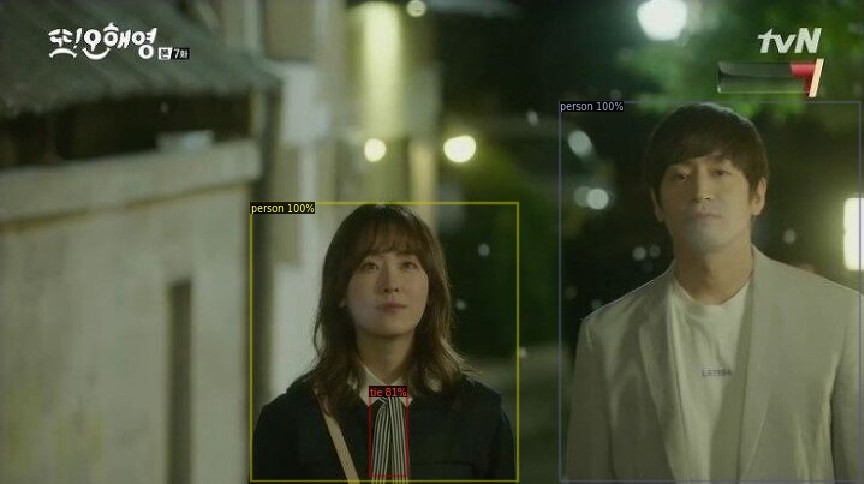

In [7]:
im = cv2.imread("./img.jpg")
outputs = predictor(im)
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
im_pil = Image.fromarray(v.get_image()[:, :,])
im_pil.show()

In [ ]:
cap = cv2.VideoCapture('./test_drama.mp4')

width = int(cap.get(3)) # 가로 길이 가져오기 
height = int(cap.get(4)) # 세로 길이 가져오기
fps = 30

fcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')
out = cv2.VideoWriter('output.mp4', fcc, fps, (width, height))

while (cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        outputs = predictor(frame)
        v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        im_pil = Image.fromarray(v.get_image()[:, :,])
        #im_pil.show()
        out.write(v.get_image()[:, :,::-1])

cap.release()
out.release()
cv2.destroyAllWindows()